In [82]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [83]:
def print_stats(num, img):
    maxv = np.max(img)
    minv = np.min(img)
    print(f'Num: {num} Type: {img.dtype} Min: {minv} Max: {maxv}')


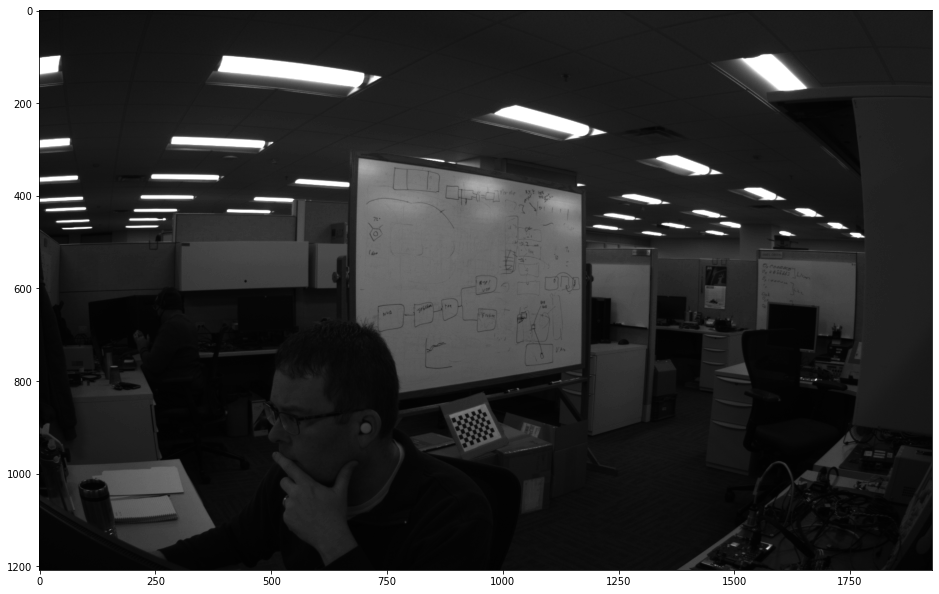

In [84]:
img = cv.imread('CaptureLinear.png', -1)
fimg = img.astype('float32') / np.max(img)
plt.imshow(fimg, cmap='gray')

Num: 1 Type: float32 Min: 5.043208599090576 Max: 6.0
Num: 2 Type: float32 Min: 0.0418422631919384 Max: 1.0
Num: 3 Type: float32 Min: 1.0512882471084595 Max: 2.0
Num: 4 Type: float32 Min: 0.07842402160167694 Max: 1.0
K1: 5  K2: 1


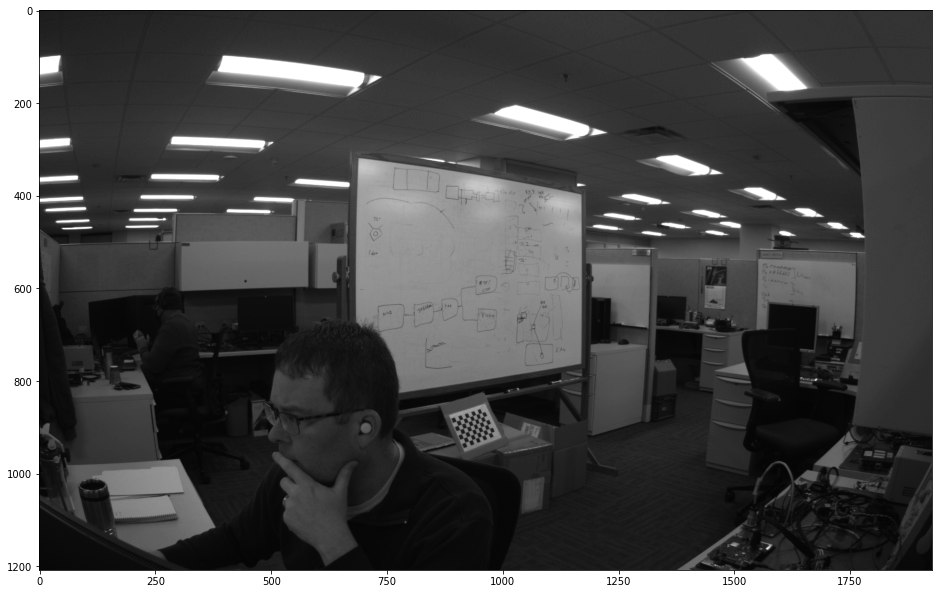

In [85]:
K1 = np.mean(fimg) / 2
K1 = 5
Hp = cv.GaussianBlur(fimg, (3,3), 3) + K1
print_stats(1, Hp)
Ibip = (1 + Hp) * (fimg) / (fimg + Hp)
print_stats(2, Ibip)

K2 = np.mean(Ibip) / 2
K2 = 1
As = cv.GaussianBlur(Ibip, (3,3), 1.5) + K2
print_stats(3, As)

Iga = (1 + As) * Ibip / (Ibip + As)
plt.imshow(Iga, cmap='gray')
print_stats(4, Iga)
print(f'K1: {K1}  K2: {K2}')
Iga = (Iga * 255).astype('uint8')

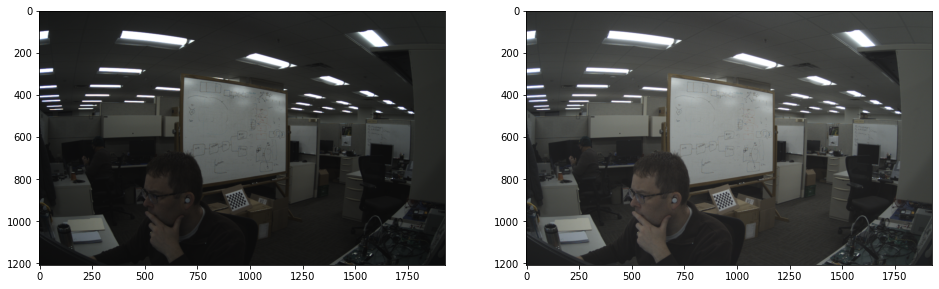

In [86]:

#cv.COLOR_BAYER_BG2BGR
#cv.COLOR_BAYER_GB2BGR
#cv.COLOR_BAYER_RG2BGR
#cv.COLOR_BAYER_GR2BGR
rgb1 = cv.cvtColor(img, cv.COLOR_BAYER_GB2BGR)
rgb2 = cv.cvtColor(Iga, cv.COLOR_BAYER_GB2BGR)
rgb1 = (rgb1 / 16).astype('uint8')

rgb1 = cv.cvtColor(rgb1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(rgb2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(rgb1)
ax[1].imshow(rgb2)

Num: 1 Type: uint16 Min: 693 Max: 8553
Num: 2 Type: float64 Min: 847.8388489208633 Max: 2660.9885477178423
Num: 3 Type: float64 Min: 114.07421875 Max: 2133.22265625
Num: 5 Type: uint16 Min: 347 Max: 2347
Num: 6 Type: uint32 Min: 466 Max: 4481
Num: 7 Type: float64 Min: 996.7692307692307 Max: 2284.8391836734695
Num: 8 Type: float64 Min: 19.074869791666668 Max: 247.93880208333334
K1: 363  K2: 214


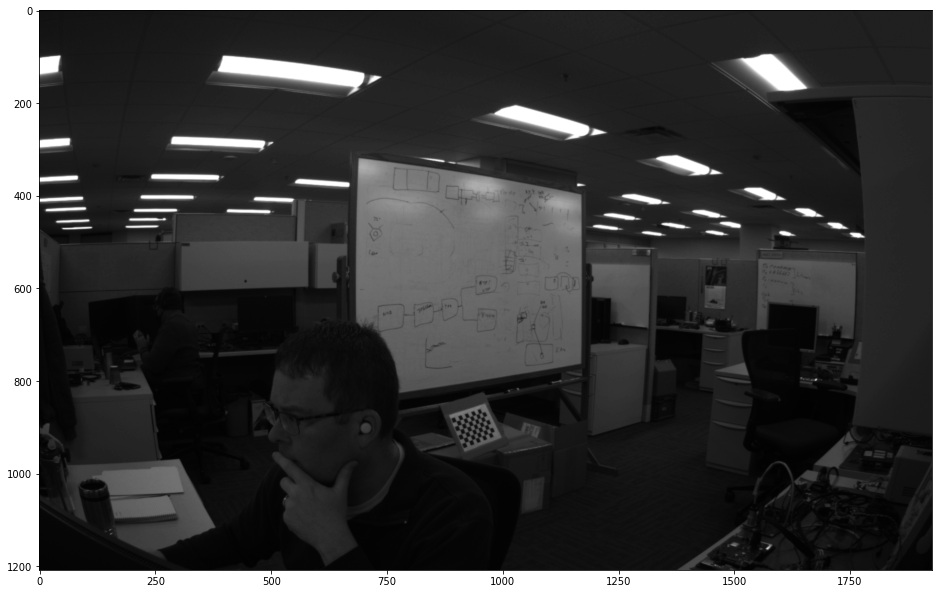

In [114]:
K1 = (np.mean(img) / 2).astype('uint16')
#K1 = 5
Hp = cv.GaussianBlur(img, (3,3), 3) + K1
temp1 = img + Hp
print_stats(1, temp1)
temp2 = ((img.astype('uint32') * 4092) / temp1)
print_stats(2, temp2)
temp2 = temp2.astype('uint32')
temp2 += 1

Ibip = (Hp.astype('uint32') * temp2.astype('uint32')) / 4096
#Ibip = (Hp * ((img * 4092) / (img + Hp))) / 4092
print_stats(3, Ibip)
Ibip = Ibip.astype('uint16')
# Ibip = (Icfa(max) + H(p)) * (Icfa(p) / (Icfa(p) + H(p)))

#plt.imshow(Ibip, cmap='gray')

K2 = (np.mean(Ibip) / 2).astype('uint16')
#K2 = 1
As = cv.GaussianBlur(Ibip, (3,3), 1.5) + K2
print_stats(5, As)

Ibip = Ibip.astype('uint32')
As = As.astype('uint32')
temp4 = Ibip + As
temp4 += 1
print_stats(6, temp4)
temp5 = (Ibip * 4092) / temp4
print_stats(7, temp5)
temp5 = temp5.astype('uint32')
Iga = ((As * temp5) / (4096 * 4.5))
print_stats(8, Iga)
print(f'K1: {K1}  K2: {K2}')
#Iga = (Iga * 255).astype('uint8')
Iga = Iga.astype('uint8')
# Iga = (Ibip(max) + A(p)) * (Ibip(p) / (Ibip(p) + A(p)))

plt.imshow(Iga, cmap='gray')

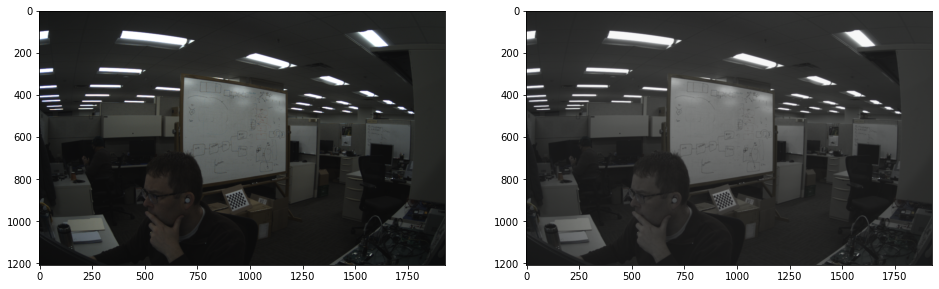

In [115]:

#cv.COLOR_BAYER_BG2BGR
#cv.COLOR_BAYER_GB2BGR
#cv.COLOR_BAYER_RG2BGR
#cv.COLOR_BAYER_GR2BGR
rgb1 = cv.cvtColor(img, cv.COLOR_BAYER_GB2BGR)
rgb2 = cv.cvtColor(Iga, cv.COLOR_BAYER_GB2BGR)
rgb1 = (rgb1 / 16).astype('uint8')

rgb1 = cv.cvtColor(rgb1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(rgb2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(rgb1)
ax[1].imshow(rgb2)